<a href="https://colab.research.google.com/github/rish4/CNN-on-KID/blob/master/cnn_KID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN for healthy v/s unhealthy classification of WCE images from KID dataset


In [2]:
# Convolutional Neural Network

# Building the CNN

# Importing the Keras packages 
from keras.models import Sequential   #to initialize the neural network
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense      # to add fully connected layers in ANN
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

Using TensorFlow backend.


In [3]:
# Initializing the CNN
classifier = Sequential()

# Step-1 Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape=(64, 64, 3), activation='relu'))

#Step-2 Max Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Adding second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Step-3 Flattening
classifier.add(Flatten())

# Full Connection
classifier.add(Dense(output_dim=128, activation='relu'))
classifier.add(Dense(output_dim=1, activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


In [0]:
# Compiling the CNN
classifier.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/KID dataset - Copy/Training set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 772 images belonging to 2 classes.


In [8]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/KID dataset - Copy/Test set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 85 images belonging to 2 classes.


In [9]:
r=classifier.fit_generator(training_set,
                         samples_per_epoch = 772,
                         nb_epoch = 25,
                         validation_data = test_set,
                         nb_val_samples = 85)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=24, epochs=25, validation_steps=85)`
  """


Epoch 1/25


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


24/24 [==============================] - 635s 26s/step - loss: 0.5808 - accuracy: 0.6986 - val_loss: 0.3371 - val_accuracy: 0.8715
Epoch 2/25
24/24 [==============================] - 29s 1s/step - loss: 0.4307 - accuracy: 0.7743 - val_loss: 0.2145 - val_accuracy: 0.9291
Epoch 3/25
24/24 [==============================] - 15s 614ms/step - loss: 0.3367 - accuracy: 0.8324 - val_loss: 0.4955 - val_accuracy: 0.7539
Epoch 4/25
24/24 [==============================] - 15s 606ms/step - loss: 0.3578 - accuracy: 0.8257 - val_loss: 0.1438 - val_accuracy: 0.9299
Epoch 5/25
24/24 [==============================] - 14s 603ms/step - loss: 0.3257 - accuracy: 0.8608 - val_loss: 0.1623 - val_accuracy: 0.9283
Epoch 6/25
24/24 [==============================] - 15s 609ms/step - loss: 0.2688 - accuracy: 0.8797 - val_loss: 0.1571 - val_accuracy: 0.9650
Epoch 7/25
24/24 [==============================] - 14s 601ms/step - loss: 0.2351 - accuracy: 0.8971 - val_loss: 0.2229 - val_accuracy: 0.9291
Epoch 8/25
24/

Loss Curve

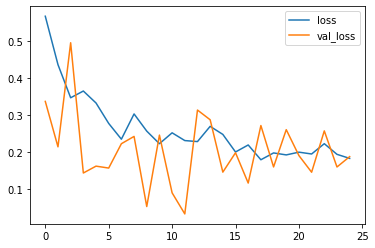

In [10]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

Accuracy Curve

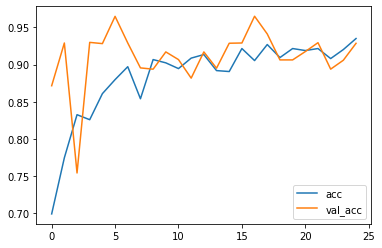

In [11]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()